In [1]:
#Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configurations plots we will create

In [7]:
#Read in the data
df = pd.read_csv(r'C:\Users\Enes\Desktop\NewProject03\CsvfilesforTableau\AustralianVehiclePrices.csv')

In [8]:
#Let's look at the data
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [11]:
#Let's see if there is any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

Brand - 5.9758575355563525e-05%
Year - 5.9758575355563525e-05%
Model - 5.9758575355563525e-05%
Car/Suv - 0.0016732401099557787%
Title - 5.9758575355563525e-05%
UsedOrNew - 5.9758575355563525e-05%
Transmission - 5.9758575355563525e-05%
Engine - 5.9758575355563525e-05%
DriveType - 5.9758575355563525e-05%
FuelType - 5.9758575355563525e-05%
FuelConsumption - 5.9758575355563525e-05%
Kilometres - 5.9758575355563525e-05%
ColourExtInt - 5.9758575355563525e-05%
Location - 0.026891358910003587%
CylindersinEngine - 5.9758575355563525e-05%
BodyType - 0.016851918250268914%
Doors - 0.0958527548703239%
Seats - 0.1018883709812358%
Price - 0.00017927572606669058%


In [12]:
#Data types for our columns

df.dtypes 

Brand                 object
Year                 float64
Model                 object
Car/Suv               object
Title                 object
UsedOrNew             object
Transmission          object
Engine                object
DriveType             object
FuelType              object
FuelConsumption       object
Kilometres            object
ColourExtInt          object
Location              object
CylindersinEngine     object
BodyType              object
Doors                 object
Seats                 object
Price                 object
dtype: object

In [15]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce').fillna(0).astype('int64')
df['Kilometres'] = pd.to_numeric(df['Kilometres'], errors='coerce').fillna(0).astype('int64')
df['Year'] = df['Year'].fillna(0).astype('int64')

In [24]:
df.sort_values(by = ['Price'], inplace =False, ascending = False)

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
15313,Ferrari,1959,250,Lorbek Luxury Cars Sydney,1959 Ferrari 250 Pininfarina,USED,Manual,-,Rear,Unleaded,-,9902,Blue / -,"Rushcutters Bay, NSW",-,Coupe,NaN,NaN,1500000
3357,McLaren,2019,720S,Convertible,2019 McLaren 720S Spider Luxury,USED,Automatic,"8 cyl, 4 L",Rear,Premium,11 L / 100 km,138,White / -,"Rushcutters Bay, NSW",8 cyl,Convertible,2 Doors,2 Seats,649880
10358,Lamborghini,2012,Aventador,Coupe,2012 Lamborghini Aventador,USED,Automatic,"12 cyl, 6.5 L",AWD,Premium,17.2 L / 100 km,27843,White / -,"Port Melbourne, VIC",12 cyl,Coupe,2 Doors,2 Seats,649880
15116,Ferrari,2023,812,NEW Available to order,2023 Ferrari 812 Superfast,NEW,Automatic,"12 cyl, 6.5 L",Rear,Premium,15 L / 100 km,0,3 years / Unlimited km,NaN,12 cyl,Coupe,2 Doors,2 Seats,610000
5271,Ferrari,2019,GTC4,Coupe,2019 Ferrari GTC4 Lusso (awd),USED,Automatic,"12 cyl, 6.3 L",AWD,Premium,15.3 L / 100 km,11480,Blue / Black,"Auburn, NSW",12 cyl,Coupe,2 Doors,4 Seats,579888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16425,Hyundai,2023,Tucson,Mantello Hyundai New & Demos,2023 Hyundai Tucson N Line (fwd),NEW,Automatic,"4 cyl, 2 L",Front,Unleaded,8.1 L / 100 km,10,White / Black,"Roxburgh Park, VIC",4 cyl,SUV,4 Doors,5 Seats,0
15955,Toyota,2007,Hiace,USED Dealer ad,2007 Toyota Hiace AMBULANCE,USED,Automatic,-,Other,-,-,0,- / -,"West Ryde, NSW",-,Commercial,NaN,NaN,0
16156,LDV,2023,D90,Miedecke Motor Group - New,2023 LDV D90 (2WD),NEW,Automatic,"4 cyl, 2 L",Rear,Unleaded,10.2 L / 100 km,9,White / -,"Port Macquarie, NSW",4 cyl,SUV,4 Doors,7 Seats,0
16155,Ssangyong,2022,Musso,NEW In stock,2022 Ssangyong Musso Ultimate XLV Luxury,NEW,Automatic,-,Other,Diesel,-,9,Black / -,"Port Macquarie, NSW",-,Ute / Tray,NaN,NaN,0


In [22]:
# Drop any duplicates
df['Brand'].drop_duplicates().sort_values(ascending=False)
df.drop_duplicates()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16729,Toyota,2014,Alphard,SYC Cars,2014 Toyota Alphard,USED,Automatic,-,Front,Unleaded,-,66000,Grey / -,"Rocklea, QLD",-,Commercial,7 Seats,NaN,29500
16730,Mercedes-Benz,2012,S-Class,USED Dealer ad,2012 Mercedes-Benz S-Class CDI BlueTEC,USED,Automatic,-,Rear,Diesel,-,117432,Silver / -,"Port Melbourne, VIC",-,NaN,NaN,NaN,39888
16731,Suzuki,2022,Vitara,Bremer Suzuki - New,2022 Suzuki Vitara 1.6L,DEMO,Automatic,"4 cyl, 1.6 L",Front,Unleaded,6.2 L / 100 km,5165,Yellow / -,"Dinmore, QLD",4 cyl,SUV,4 Doors,5 Seats,35280
16732,Mercedes-Benz,2016,GLC250,SUV,2016 Mercedes-Benz GLC250,USED,Automatic,"4 cyl, 2 L",AWD,Premium,7.2 L / 100 km,85525,Grey / Black,"Albion, QLD",4 cyl,SUV,4 Doors,5 Seats,41888


In [25]:
# Testing a correlation

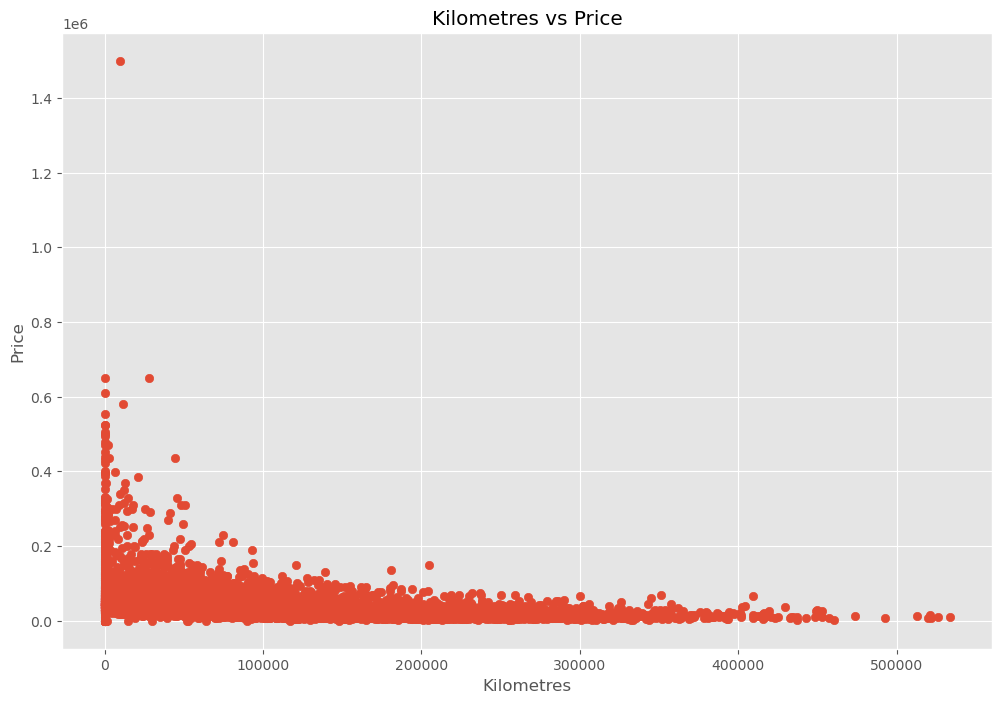

In [27]:
# Scatter plot with price vs kilometres

plt.scatter(x = df['Kilometres'], y = df['Price'])

plt.title('Kilometres vs Price')

plt.xlabel('Kilometres')
plt.ylabel('Price')

plt.show()

<Axes: xlabel='Kilometres', ylabel='Price'>

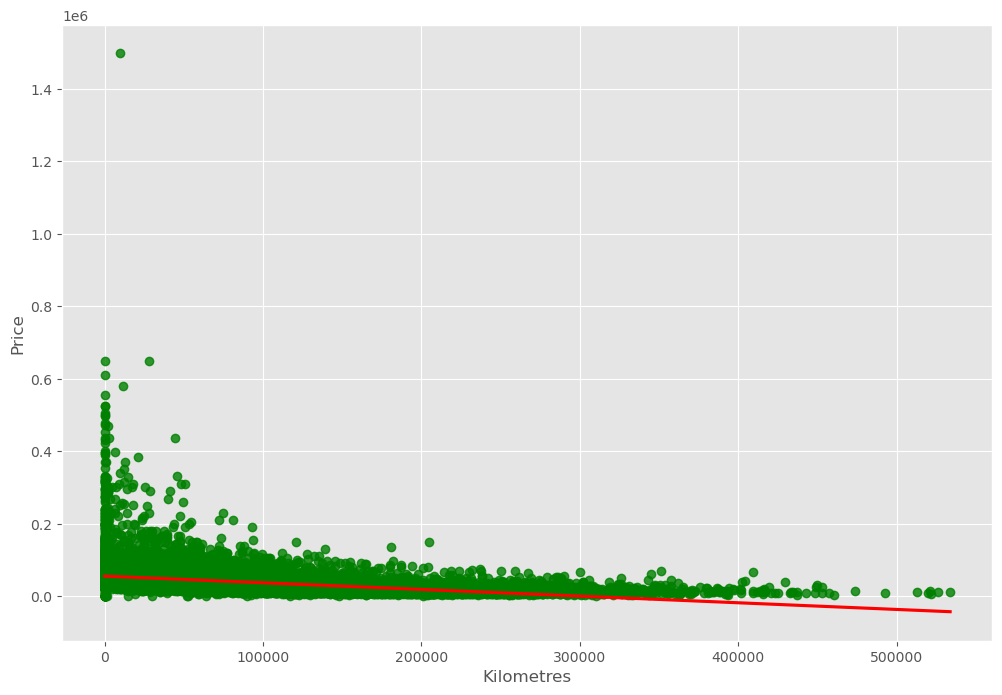

In [28]:
# Plot Kilometres vs Price using seaborn

sns.regplot(x = 'Kilometres', y = 'Price',data = df, scatter_kws= {"color":"green"}, line_kws={"color":"red"})

In [29]:
# Let's start looking at correlation

In [30]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr(method = 'pearson')
correlation_matrix

,Year,Kilometres,Price
Year,1.000000,-0.222003,0.118594
Kilometres,-0.222003,1.000000,-0.391273
Price,0.118594,-0.391273,1.000000


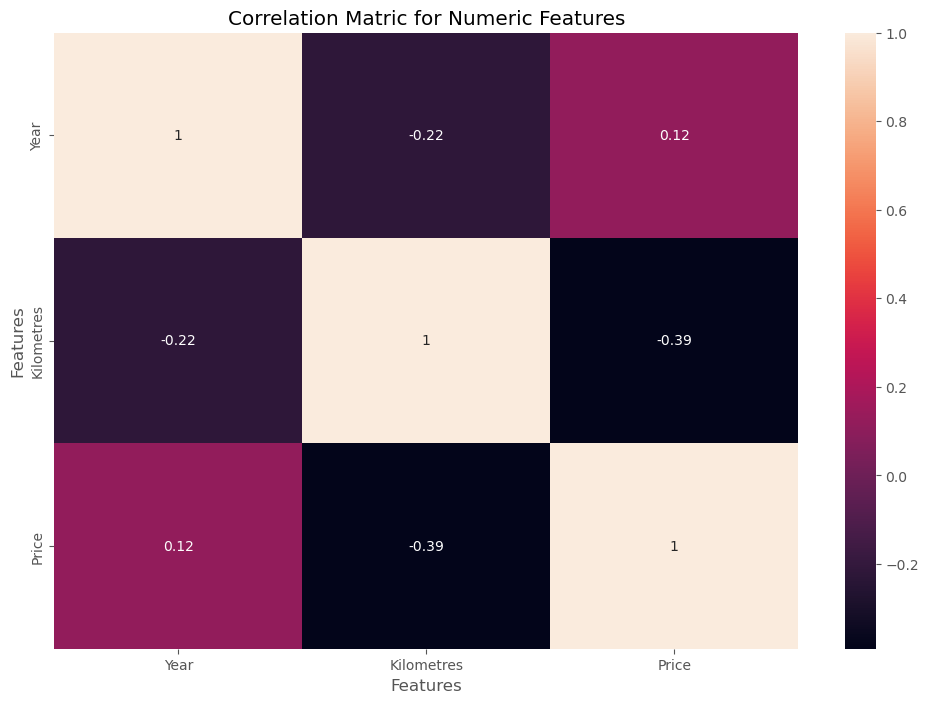

In [31]:
sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show()

In [34]:
# Looks at Brands
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [36]:
# Numerizing the values

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

In [37]:
df_numerized.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,68,2022,624,509,7850,0,1,33,1,1,144,5595,670,113,7,6,5,10,51990
1,46,2022,495,227,7677,2,1,26,2,7,124,16,64,80,7,3,7,8,19990
2,4,2022,62,161,7451,2,1,31,4,7,123,8472,425,526,7,2,1,7,108988
3,51,2011,274,161,1814,2,1,97,4,7,15,136517,715,374,10,2,1,7,32990
4,62,2022,127,469,7819,2,1,24,2,8,117,1035,328,119,7,6,5,8,34990


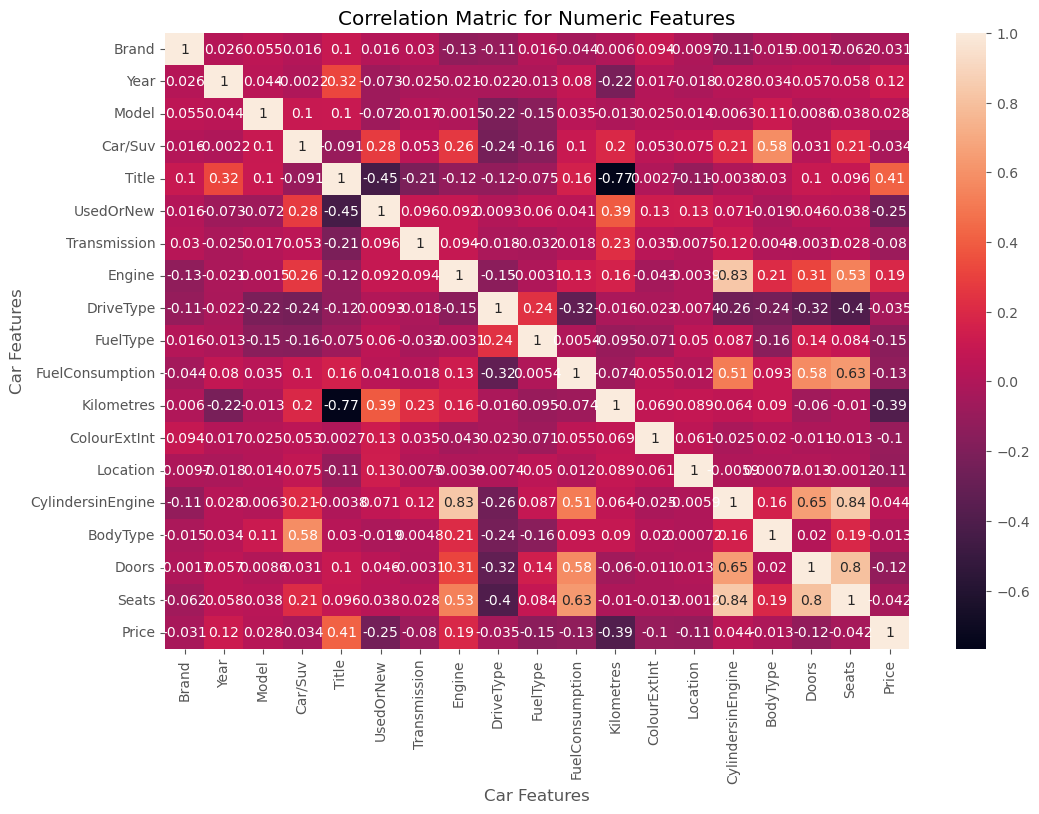

In [38]:
correlation_matrix = df_numerized.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Car Features')
plt.ylabel('Car Features')

plt.show()

In [40]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

Brand              Brand                1.000000
                   Year                 0.026095
                   Model                0.055176
                   Car/Suv              0.016204
                   Title                0.101077
                   UsedOrNew            0.016180
                   Transmission         0.030009
                   Engine              -0.127497
                   DriveType           -0.108089
                   FuelType             0.016259
                   FuelConsumption     -0.043868
                   Kilometres           0.005997
                   ColourExtInt         0.094108
                   Location            -0.009665
                   CylindersinEngine   -0.111203
                   BodyType            -0.015076
                   Doors               -0.001728
                   Seats               -0.062322
                   Price               -0.031223
Year               Brand                0.026095
                   Y

In [41]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

Kilometres         Title               -0.766843
Title              Kilometres          -0.766843
UsedOrNew          Title               -0.447296
Title              UsedOrNew           -0.447296
Seats              DriveType           -0.397128
DriveType          Seats               -0.397128
Price              Kilometres          -0.391273
Kilometres         Price               -0.391273
FuelConsumption    DriveType           -0.324375
DriveType          FuelConsumption     -0.324375
Doors              DriveType           -0.320495
DriveType          Doors               -0.320495
CylindersinEngine  DriveType           -0.258720
DriveType          CylindersinEngine   -0.258720
UsedOrNew          Price               -0.248870
Price              UsedOrNew           -0.248870
DriveType          Car/Suv             -0.241393
Car/Suv            DriveType           -0.241393
BodyType           DriveType           -0.237077
DriveType          BodyType            -0.237077
Year               K

In [42]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

FuelConsumption    CylindersinEngine    0.513259
CylindersinEngine  FuelConsumption      0.513259
Seats              Engine               0.533823
Engine             Seats                0.533823
Doors              FuelConsumption      0.575962
FuelConsumption    Doors                0.575962
BodyType           Car/Suv              0.580999
Car/Suv            BodyType             0.580999
Seats              FuelConsumption      0.630760
FuelConsumption    Seats                0.630760
Doors              CylindersinEngine    0.648411
CylindersinEngine  Doors                0.648411
Doors              Seats                0.801417
Seats              Doors                0.801417
Engine             CylindersinEngine    0.830515
CylindersinEngine  Engine               0.830515
Seats              CylindersinEngine    0.836444
CylindersinEngine  Seats                0.836444
Brand              Brand                1.000000
FuelType           FuelType             1.000000
Doors              D

In [ ]:
# The correlation of 0.630760 between Fuel Consumption and Seats in a dataset suggests a positive relationship,
#indicating that vehicles with more seats tend to have higher fuel consumption